<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Classification/Models%20on%20ISEAR%20Dataset/Logistic%20Regression/ktrain_fasttext_isear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Shamsul Arefin

**Description**: In this file I implemented the Logistic Regression Model with the FastText library, in the ktrain package. The dataset used is the ISEAR dataset.

**Installing ktrain wrapper library**

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 6.8MB 51.6MB/s 
     |████████████████████████████████| 983kB 49.9MB/s 
     |████████████████████████████████| 266kB 51.4MB/s 
     |████████████████████████████████| 1.9MB 44.7MB/s 
     |████████████████████████████████| 1.2MB 43.5MB/s 
     |████████████████████████████████| 471kB 47.0MB/s 
     |████████████████████████████████| 870kB 22.6MB/s 
     |████████████████████████████████| 3.3MB 45.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=c385d4815b19f937fb9c92bb60470ce2e2b305f0e5542420a75bb33fe4ff1910
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=99618630a7b221b3d75556450dbe18189ceac53de5fd2f65b10559103d8ceeff
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

**Installing other dependecies such as pandas, numpy**

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

**Mounting google drive storage**

In [ ]:
cd drive/MyDrive/bert-project-data/

/content/drive/MyDrive/bert-project-data


**Processing the input into Dataframe, splitting data**

In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('./Isear.csv', encoding='utf-8')


X_all = data.Text.tolist()
y_all = data.Emotion.tolist()


class_names = ['joy', 'sadness', 'fear', 'anger', 'disgust','shame','guilt']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.2, random_state=4)
print('size of train set: %s' % (len(X_train)))
print('size of test set: %s' % (len(X_test)))
data.head(10)

size of train set: 6132
size of test set: 1534


,Emotion,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...
5,anger,During the short period of my unemployment abo...
6,anger,When my chief accused me of an error that I ha...
7,anger,A girl entered in the division where I work an...
8,anger,"When I was dancing with a dame at a social, on..."
9,anger,My mother was ill and asked me to prpare our l...


**Changing string encoding of labels to integers for model preprocessing**

In [ ]:
#Run this code exactly once after running the previous block of code
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'disgust':4,
    'shame':5,
    'guilt':6
}

# Integer values for each class


# encoding_2_modified = {value:key for key, value in encoding.items()}
y_test_string_backup = y_test.copy()
y_train_2 = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]
print("Encoding block of code ran successfully")

Encoding block of code ran successfully


**Preprocessing input data for the FastText(LogisticRegression) model by the library**

In [ ]:
(x_train,  y_train_2), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train_2,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names =class_names,
                                                                       maxlen=350, 
                                                                       max_features=35000,
                                                                       ngram_range=1)

language: en
Word Counts: 8182
Nrows: 6132
6132 train sequences
train sequence lengths:
	mean : 22
	95percentile : 49
	99percentile : 55
x_train shape: (6132,350)
y_train shape: (6132, 7)
Is Multi-Label? False
1534 test sequences
test sequence lengths:
	mean : 22
	95percentile : 48
	99percentile : 53
x_test shape: (1534,350)
y_test shape: (1534, 7)
task: text classification


**Defining model with the preprocessed data**

In [ ]:
model = text.text_classifier('fasttext', (x_train, y_train_2), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train_2), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 350
done.


**Training the model with the train data**

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
192/192 [==============================] - 8s 23ms/step - loss: 2.5055 - accuracy: 0.1387
Epoch 2/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.5200 - accuracy: 0.1300
Epoch 3/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.4570 - accuracy: 0.1466
Epoch 4/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.3914 - accuracy: 0.1527
Epoch 5/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.2902 - accuracy: 0.1495
Epoch 6/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.0114 - accuracy: 0.2135
Epoch 7/1024
192/192 [==============================] - 4s 23ms/step - loss: 1.7537 - accuracy: 0.3242
Epoch 8/1024
192/192 [==============================] - 4s 23ms/step - loss: 1.9403 - accuracy: 0.1854
Epoch 9/1024
192/192 [==============================] - 4s 23ms/step - loss: 2.0132 - accurac

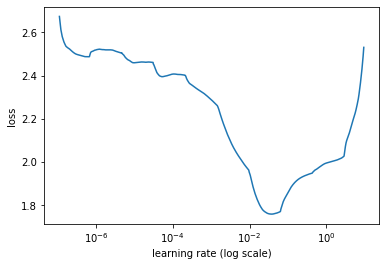

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
learner.autofit(0.01)
#learner.fit_onecycle(2e-5, 15)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
192/192 [==============================] - 6s 28ms/step - loss: 2.0350 - accuracy: 0.2092 - val_loss: 1.9314 - val_accuracy: 0.2040
Epoch 2/1024
192/192 [==============================] - 5s 25ms/step - loss: 1.6883 - accuracy: 0.3583 - val_loss: 1.6099 - val_accuracy: 0.4472
Epoch 3/1024
192/192 [==============================] - 5s 25ms/step - loss: 1.4909 - accuracy: 0.4452 - val_loss: 1.3786 - val_accuracy: 0.5130
Epoch 4/1024
192/192 [==============================] - 5s 25ms/step - loss: 1.3575 - accuracy: 0.5078 - val_loss: 1.3201 - val_accuracy: 0.5150
Epoch 5/1024
192/192 [==============================] - 5s 25ms/step - loss: 1.2684 - accuracy: 0.5514 - val_loss: 1.3343 - val_accuracy: 0.5013
Epoch 6/1024
192/192 [==============================] - 5s 25ms/step - loss: 1.1670 - accura

**Validating the model on the test data and getting Confusion Matrix**

In [ ]:
confusion_matrix = learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

         joy       0.71      0.69      0.70       236
     sadness       0.62      0.57      0.60       218
        fear       0.67      0.61      0.64       211
       anger       0.34      0.61      0.44       212
     disgust       0.54      0.50      0.52       206
       shame       0.59      0.36      0.44       244
       guilt       0.45      0.43      0.44       207

    accuracy                           0.54      1534
   macro avg       0.56      0.54      0.54      1534
weighted avg       0.57      0.54      0.54      1534



**Plotting the confusion matrix**

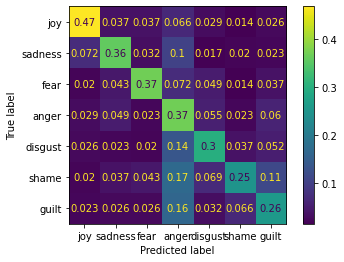

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

norm = np.linalg.norm(confusion_matrix)
normal_array = confusion_matrix/norm

disp = ConfusionMatrixDisplay(confusion_matrix=normal_array,
                              display_labels=class_names)
#plot_confusion_matrix()


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True,
                 cmap='viridis', ax=None, xticks_rotation='horizontal')

**Getting the predictor object from the trained Model**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['joy', 'sadness', 'fear', 'anger', 'disgust', 'shame', 'guilt']

**Testing the model predictor with a new sentence**

In [ ]:
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: sadness (0.04)


**Saving the trained model predictor to Google Drive**

In [ ]:
# let's save the predictor for later use
predictor.save("models/fast_text-isear/")

**Load the saved model predictor to check if it works**

In [ ]:
#testing if predictor can loaded from storage
predictor = ktrain.load_predictor("models/fast_text-isear/")

**Feeding a sentence to the retrieved model predictor**

In [ ]:
#testing again
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: sadness (0.09)


 **Getting Weighted Accuracy Score**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
prediction_y = predictor.predict(X_test)
balanced_accuracy_score(y_test_string_backup, prediction_y) # y_test_string_backup is the y_test in the string label format, because in the above we already converted y_test to a  integer label

0.5400188271160121

**ROC Curves**

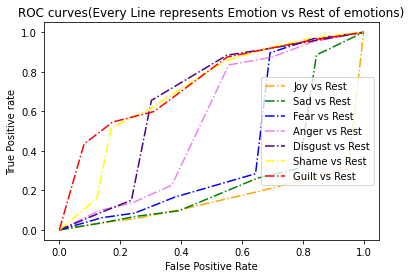

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

false_positive_rate = {}
true_positive_rate = {}
threshold ={}

y_pred = [encoding[x] for x in prediction_y]
y_test_g = [encoding[x] for x in y_test_string_backup]
number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test_g, y_pred, pos_label=i)
       
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='Joy vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='Sad vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='Fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='Anger vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='Disgust vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='Shame vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Guilt vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350); 

**ROC AUC Score**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test_string_backup)

y_test_roc = lb.transform(y_test_string_backup)
y_pred_roc = lb.transform(prediction_y)

In [ ]:
# For Multiclass case
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_roc, y_pred_roc, multi_class='ovo')

**References**:


1.   ktrain official documentation examples: https://nbviewer.jupyter.org/github/amaiya/ktrain/tree/master/examples/
2.   KFold documentation of SKLearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
3. Confusion Matrix method: https://stackoverflow.com/a/59170865

